# Lending Club Case Study - EDA 

In [5]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [6]:
#pandas set_option allows us to see all the columns
pd.set_option("display.max_columns",None)

In [7]:
#reading dataset into data frame
dataset=pd.read_csv('/Users/aadyanthmasthipuram/Downloads/loan 2.csv')
#printing first five rows of dataset
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [102]:
#dropping N/A columns from the dataset
dataset.isnull().any().value_counts()
dataset.dropna(how='all', axis=1, inplace=True) #dropping null columns

dataset = dataset.iloc[:, 0:49] #filtering the dataset to get rid of columns not required for EDA
dataset.drop_duplicates
dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN

In [103]:
#info() will provide number of non-null values, and data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [104]:
#Checking different categories in loan_status variable, which is the target variable
dataset['loan_status'].value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [105]:
#Considering only data related to loan_status as "Fully Paid" and "Charged Off", dropping current loan statuses
data=dataset.loc[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]
data.shape

(38577, 48)

In [106]:
#Checking what are the features with NaN values
features_with_na=[feature for feature in data.columns if data[feature].isna().sum()>0]
features_with_na

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d']

In [107]:
#Checking fractional amount of data missing in the features with null values
missing = data[features_with_na].isnull().mean().sort_values(ascending=False)
missing

next_pymnt_d              1.000000
mths_since_last_record    0.928973
mths_since_last_delinq    0.645592
desc                      0.324727
emp_title                 0.061850
emp_length                0.026778
last_pymnt_d              0.001840
revol_util                0.001296
title                     0.000285
dtype: float64

Text(0, 0.5, 'Feature count')

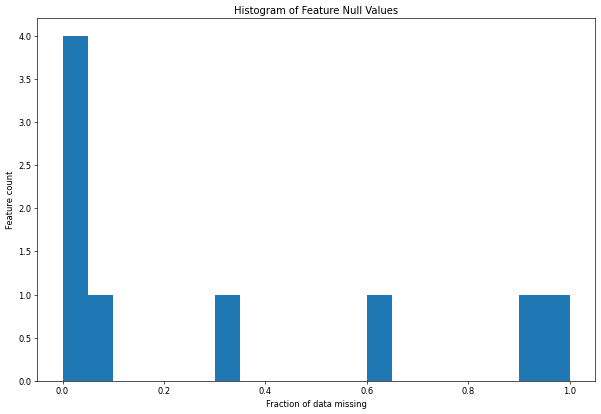

In [108]:
#Plotting histogram for this fractional data
plt.figure(figsize=(12,8), dpi=60)
missing.plot.hist(bins=20)
plt.title('Histogram of Feature Null Values')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [109]:
#Preparing list of features having null values greater than 30%
drop_list = sorted(list(missing[missing > 0.3].index))
drop_list

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [110]:
#Dropping the features having null values greater than 30%, as it is highly difficult to impute them accurately
data.drop(labels=drop_list, axis=1, inplace=True)
data.shape

(38577, 44)

In [111]:
#Filling the missing values of "revol_util" feature with it's mean value
data["revol_util"].fillna(value=data["revol_util"].mean(), inplace=True)
data["revol_util"].isna().sum()

TypeError: can only concatenate str (not "int") to str

In [17]:
#Using the domain expertise, a list of feature to keep in the analysis is prepared
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
len(keep_list)

31

In [18]:
#A list which are not part of keep_list are prepared
drop_list = [col for col in data.columns if col not in keep_list]
print(drop_list)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']


In [19]:
#Drop the drop_list
data.drop(labels=drop_list, axis=1, inplace=True)
data.shape

(38577, 26)

In [20]:
#Check the unique values of "id" variable
data["id"].nunique()

38577

In [21]:
#drop the "id" variable, as there are too many unique values init, because it's not going to help in the analysis
data.drop('id', axis=1, inplace=True)
data.shape

(38577, 25)

In [22]:
#Check the summary statistics 
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [23]:
# A function is defined to plot distplot and boxplot
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    if continuous:
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    plt.tight_layout()

In [24]:
#check skewness and kurtosis
print(data["loan_amnt"].skew())
print(data["loan_amnt"].kurt())

1.0781026597810632
0.8429524525755574


In [25]:
#calculate zscore to findout outliers and remove outliers
from scipy import stats
data = data[np.abs(stats.zscore(data["loan_amnt"]))<3]
data.shape

(37936, 25)

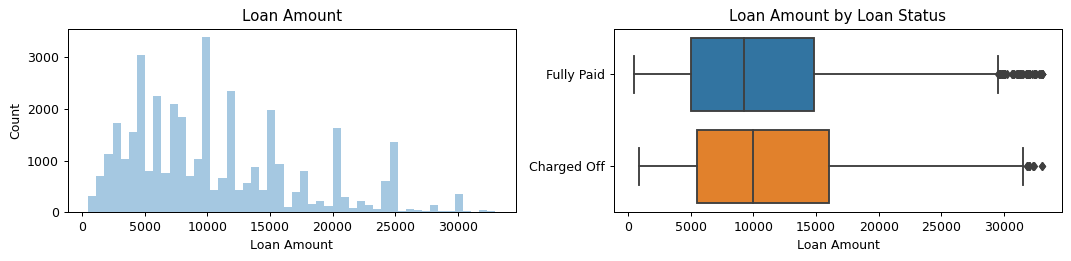

In [26]:
# plot the distplot and boxplot of loan_amnt
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [27]:
#check summary statistics by grouping loan_status wise
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5470.0,11448.642596,7200.001213,900.0,5500.0,10000.0,16000.0,33000.0
Fully Paid,32466.0,10507.655701,6621.319442,500.0,5000.0,9250.0,14800.0,33000.0


In [28]:
#check value counts of different categories of term variable
data['term'].value_counts(dropna=False)

 36 months    28926
 60 months     9010
Name: term, dtype: int64

In [29]:
data['term'].value_counts(normalize=True)

 36 months    0.762495
 60 months    0.237505
Name: term, dtype: float64

In [30]:
data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
 36 months    0.111042
 60 months    0.250610
Name: loan_status, dtype: float64

In [31]:
data['int_rate'].describe()

count      37936
unique       370
top       10.99%
freq         896
Name: int_rate, dtype: object

ValueError: could not convert string to float: '10.65%'

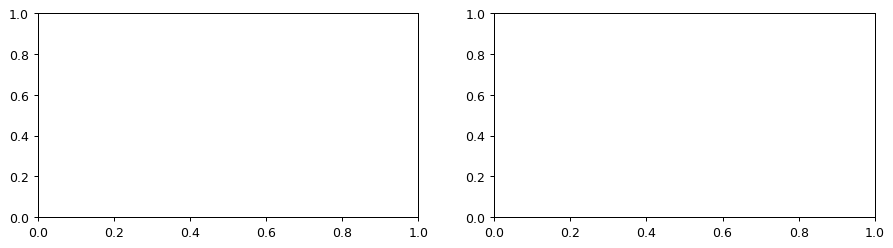

In [32]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [33]:
print(data["int_rate"].skew())
print(data["int_rate"].kurt())

TypeError: could not convert string to float: '10.65%'

In [34]:
data.groupby('loan_status')['int_rate'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5470,332,11.49%,126
Fully Paid,32466,360,10.99%,803


In [35]:
data['installment'].describe()

count    37936.000000
mean       312.681133
std        194.539773
min         15.690000
25%        164.550000
50%        273.760000
75%        412.800000
max       1231.450000
Name: installment, dtype: float64

In [36]:
print(data["installment"].skew())
print(data["installment"].kurt())

0.9931732956818372
0.6967535821043982


In [37]:
#calculate zscore to findout outliers and remove outliers
data = data[np.abs(stats.zscore(data["installment"]))<3]
data.shape

(37703, 25)

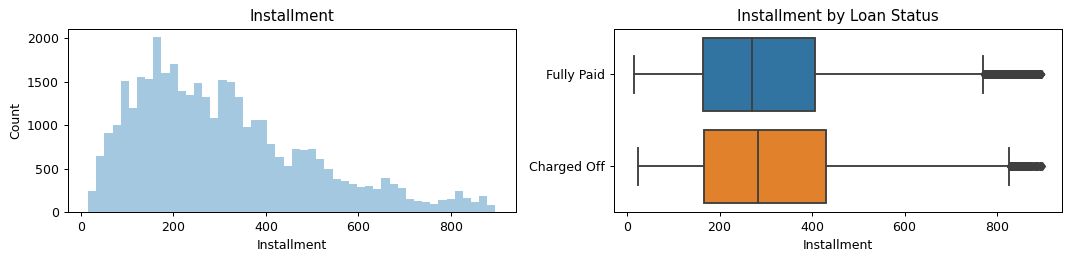

In [38]:
plot_var('installment', 'Installment', continuous=True)

In [39]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5438.0,317.048814,192.313869,22.79,166.63,284.05,430.335,896.19
Fully Paid,32265.0,307.164734,187.169832,15.69,163.67,270.21,406.360,895.73


In [40]:
print(sorted(data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [41]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [42]:
#drop grade variable as it is alraedy hidden in sub_grade variable
data.drop('grade', axis=1, inplace=True)
data.shape

(37703, 24)

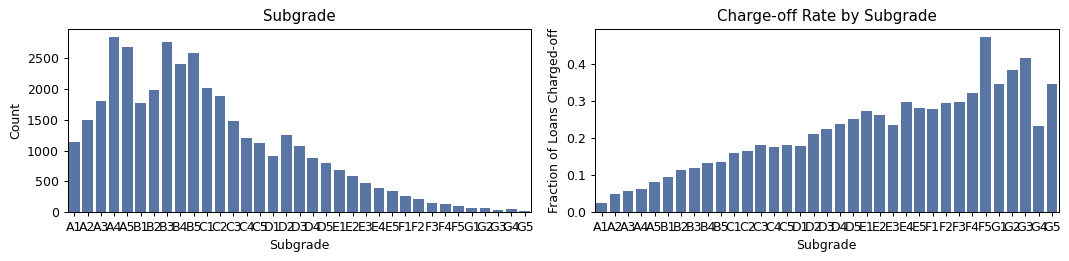

In [43]:
plot_var('sub_grade', 'Subgrade', continuous=False)

In [44]:
data['emp_title'].describe()

count       35395
unique      27516
top       US Army
freq          125
Name: emp_title, dtype: object

In [45]:
#As there are too many unique values in emp_title field as it is not going to provide us any useful information
data.drop(labels='emp_title', axis=1, inplace=True)
data.shape

(37703, 23)

In [46]:
data['emp_length'].value_counts(dropna=False).sort_index()

1 year       3124
10+ years    8167
2 years      4219
3 years      3941
4 years      3276
5 years      3126
6 years      2124
7 years      1666
8 years      1389
9 years      1208
< 1 year     4443
NaN          1020
Name: emp_length, dtype: int64

In [47]:
#considering 10+ years as 10 years for further processing
data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [48]:
#considering <1 year as 0 years for convenience
data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [49]:
#funtion to convert emp_length data from object data to string data
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [50]:
#converting emp_length data from object data to integer data
data['emp_length'] = data['emp_length'].apply(emp_length_to_int)

In [51]:
#fill NaN values of emp_length with it's mean value
data["emp_length"].fillna(value=data["emp_length"].mean(), inplace=True)
data["emp_length"].isna().sum()

0

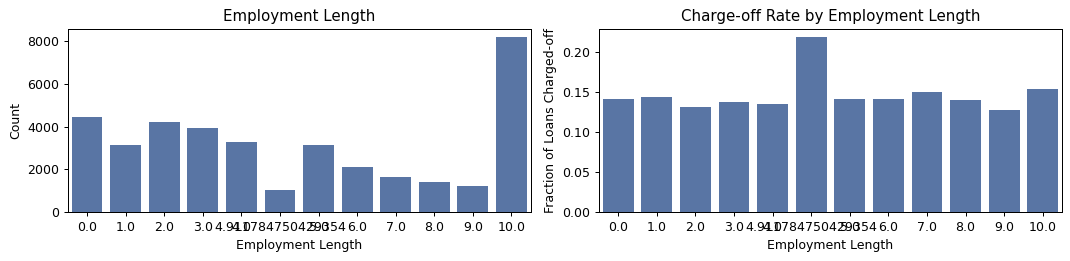

In [52]:
plot_var('emp_length', 'Employment Length', continuous=False)

In [53]:
data['home_ownership'].value_counts(dropna=False)

RENT        18259
MORTGAGE    16417
OWN          2927
OTHER          97
NONE            3
Name: home_ownership, dtype: int64

In [54]:
data['home_ownership'].replace('NONE', 'OTHER', inplace=True)
data['home_ownership'].value_counts(dropna=False)

RENT        18259
MORTGAGE    16417
OWN          2927
OTHER         100
Name: home_ownership, dtype: int64

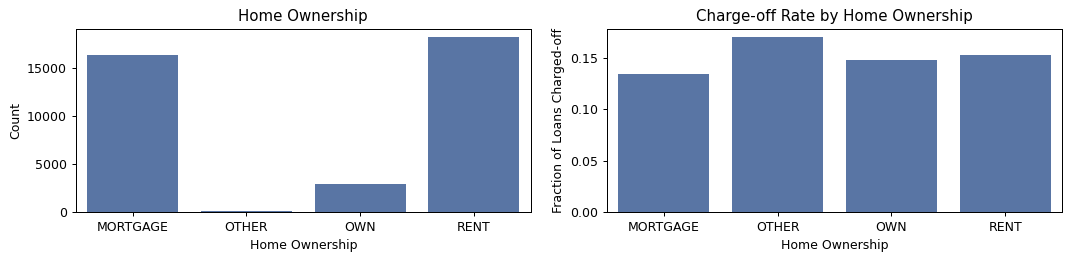

In [55]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [56]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.134007
OTHER       0.170000
OWN         0.147933
RENT        0.152692
Name: loan_status, dtype: float64

In [57]:
data['annual_inc'].describe()

count    3.770300e+04
mean     6.736707e+04
std      6.305567e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.760000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [58]:
#feature engineering
data['log_annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))

In [59]:
data.drop('annual_inc', axis=1, inplace=True)

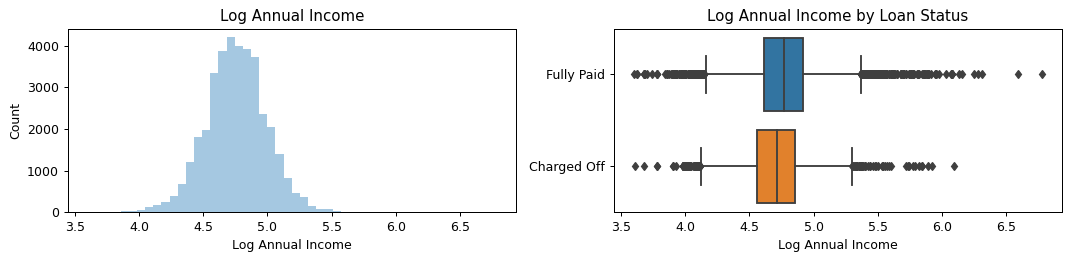

In [60]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [61]:
data.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5438.0,4.713915,0.239981,3.610767,4.561164,4.716012,4.857339,6.096910
Fully Paid,32265.0,4.764397,0.238985,3.602169,4.610671,4.770859,4.913819,6.778151


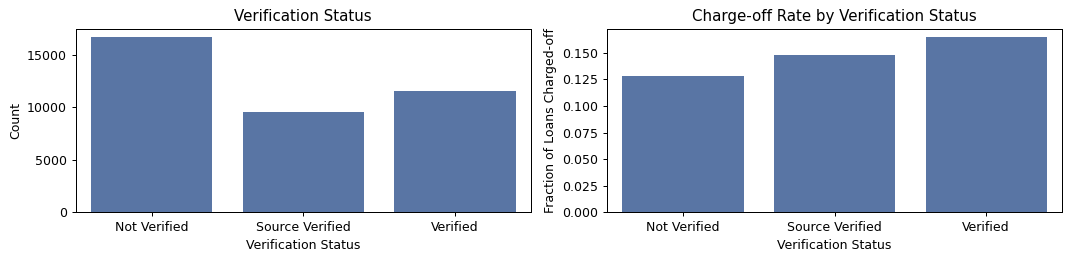

In [62]:
plot_var('verification_status', 'Verification Status', continuous=False)

In [63]:
data['purpose'].value_counts()

debt_consolidation    17572
credit_card            4926
other                  3827
home_improvement       2773
major_purchase         2130
small_business         1662
car                    1499
wedding                 917
medical                 677
moving                  571
vacation                375
house                   349
educational             325
renewable_energy        100
Name: purpose, dtype: int64

In [64]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.102508
major_purchase        0.103286
credit_card           0.106577
car                   0.106738
home_improvement      0.120447
vacation              0.141333
debt_consolidation    0.151548
medical               0.153619
house                 0.154728
moving                0.161121
other                 0.162791
educational           0.172308
renewable_energy      0.180000
small_business        0.265945
Name: loan_status, dtype: float64

In [65]:
data['title'].describe()

count                  37692
unique                 19028
top       Debt Consolidation
freq                    2015
Name: title, dtype: object

In [66]:
#drop the title variable as there are too many unique values present init and as it is not hlpful for our analysis
data.drop('title', axis=1, inplace=True)

In [67]:
data.shape

(37703, 22)

In [68]:
#check the number of unique values present in zip_code variable
data['zip_code'].nunique()

822

In [69]:
#drop the zip_code variable as there are too many categories present init and as it is not hlpful in our analysis
data.drop(labels='zip_code', axis=1, inplace=True)

In [70]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
WY    0.038961
DC    0.069307
MS    0.105263
DE    0.108108
VT    0.115385
TX    0.115533
KS    0.116466
AR    0.117391
TN    0.117647
AL    0.118483
PA    0.118503
WV    0.121212
CO    0.121294
LA    0.121429
MA    0.122848
MT    0.123457
VA    0.125467
CT    0.127841
OH    0.129453
RI    0.129534
MN    0.131980
NY    0.132800
IL    0.133472
WI    0.142191
AZ    0.142686
OK    0.142857
UT    0.142857
SC    0.143177
NH    0.144654
MI    0.144737
KY    0.146104
NC    0.153103
WA    0.155087
MD    0.155311
NJ    0.155837
GA    0.156672
CA    0.160625
OR    0.163972
NM    0.164835
ID    0.166667
MO    0.170732
HI    0.172840
FL    0.179713
SD    0.193548
AK    0.200000
NV    0.220085
NE    0.600000
Name: loan_status, dtype: float64

In [71]:
data['dti'].describe()

count    37703.000000
mean        13.266943
std          6.677532
min          0.000000
25%          8.120000
50%         13.360000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

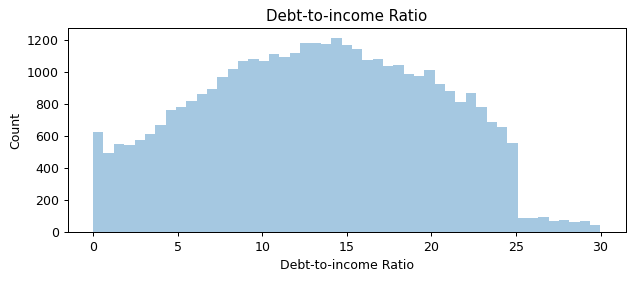

In [72]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.dti, kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [73]:
print(data["dti"].skew())
print(data["dti"].kurt())

-0.027081154819355028
-0.858569924480086


In [74]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5438.0,13.987563,6.601776,0.0,9.04,14.285,19.3075,29.85
Fully Paid,32265.0,13.145488,6.682669,0.0,7.98,13.190,18.4000,29.99


In [75]:
data['earliest_cr_line'].sample(5)

7672     Sep-01
37335    Sep-01
22990    Aug-95
6442     Jun-00
20836    Aug-07
Name: earliest_cr_line, dtype: object

In [76]:
#check are there any null values in earliest_cr_line variable
data['earliest_cr_line'].isnull().any()

False

In [77]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda s: s.year)
data['earliest_cr_line'].describe()

AttributeError: 'str' object has no attribute 'year'

ValueError: could not convert string to float: 'Jan-85'

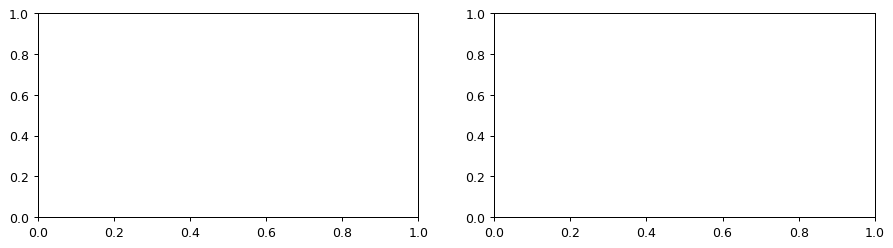

In [78]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

In [79]:
print(data["earliest_cr_line"].skew())
print(data["earliest_cr_line"].kurt())

TypeError: could not convert string to float: 'Jan-85'

In [80]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'log_annual_inc'],
      dtype='object')

Text(0.5, 1.0, 'Number of Open Credit Lines')

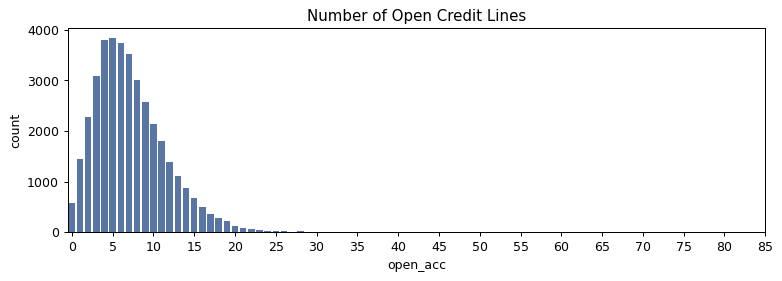

In [81]:
#plot the count plot of open_acc
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(data['open_acc'], order=sorted(data['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [82]:
data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5438.0,9.126149,4.518115,2.0,6.0,8.0,12.0,38.0
Fully Paid,32265.0,9.256098,4.372561,2.0,6.0,9.0,12.0,44.0


In [83]:
#check the different values that are present in pub_rec variable
data['pub_rec'].value_counts().sort_index()

0    35657
1     1990
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [84]:
#group the data  by status wise and find the summary statistics individually for each group for pub_rec variable
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5438.0,0.085693,0.286431,0.0,0.0,0.0,0.0,2.0
Fully Paid,32265.0,0.051046,0.229741,0.0,0.0,0.0,0.0,4.0


In [85]:
#summary statistics of revol_bal variable
data['revol_bal'].describe()

count     37703.000000
mean      12970.108479
std       15493.154087
min           0.000000
25%        3603.000000
50%        8613.000000
75%       16516.000000
max      149588.000000
Name: revol_bal, dtype: float64

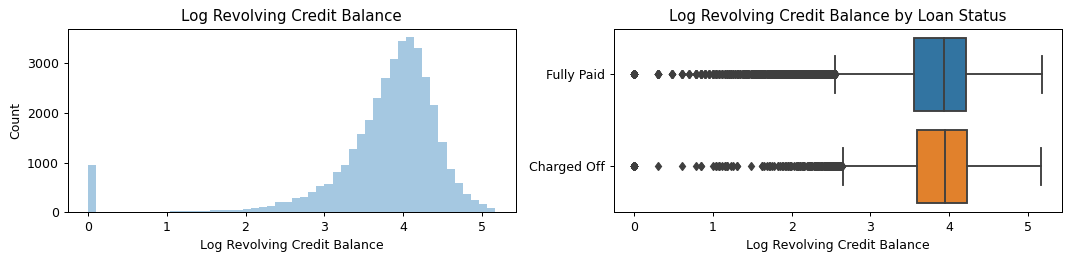

In [86]:
#converting revol_bal variable into log_revol_bal as part of feature engineering and dropping revol_bal variable
data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))
data.drop('revol_bal', axis=1, inplace=True)
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [87]:
#print skewness and kurtosis of log_revol_bal
print(data["log_revol_bal"].skew())
print(data["log_revol_bal"].kurt())
data.shape

-2.6497524110494224
9.304262363205618


(37703, 21)

In [88]:
#calculate zscore to findout outliers and remove outliers
from scipy import stats
data = data[np.abs(stats.zscore(data["log_revol_bal"]))<3]
data.shape

(36641, 21)

In [89]:
#group the data loan status wise and find summary statistics for log_revol_bal
data.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5267.0,3.895294,0.520990,1.30103,3.639686,3.970114,4.237569,5.17269
Fully Paid,31374.0,3.866957,0.543418,1.30103,3.592621,3.947507,4.224475,5.17490


In [90]:


#central tendencies and dispersions of revol_util
data['revol_util'].describe()

count     36640
unique     1023
top          0%
freq         64
Name: revol_util, dtype: object

ValueError: could not convert string to float: '83.70%'

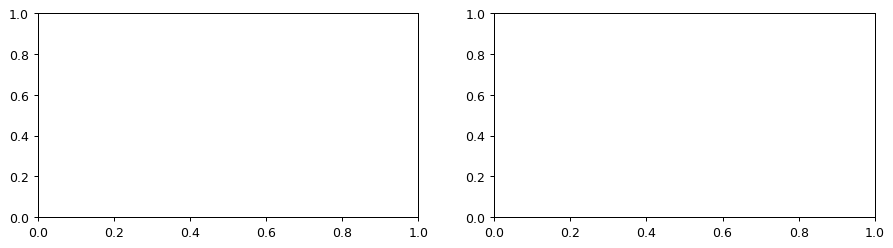

In [91]:
#plotting distplot and boxplot for revol_util
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [92]:
#grouping the data loan status wise and finding summary statistics for revol_util
data.groupby('loan_status')['revol_util'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5267,989,66.60%,17
Fully Paid,31373,1021,63%,54


Text(0.5, 1.0, 'Total Number of Credit Lines')

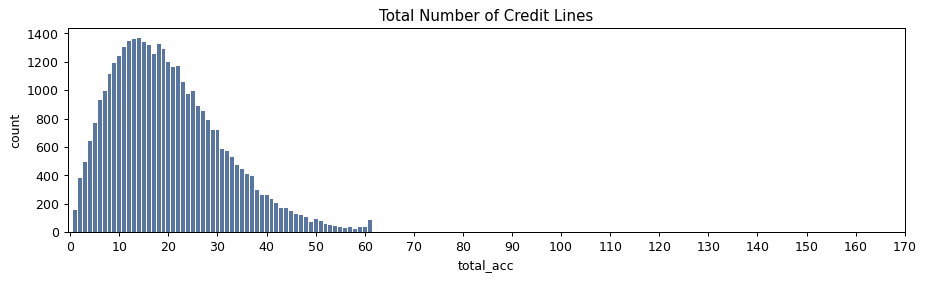

In [93]:
#count plot as a histplot accross a categorical variable total_acc
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(data['total_acc'], order=sorted(data['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [94]:
#finding summary statistics of total_acc after grouping the data by loan_status 
data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5267.0,21.453389,11.379642,2.0,13.0,20.0,28.0,74.0
Fully Paid,31374.0,22.119207,11.385226,2.0,14.0,20.0,29.0,90.0


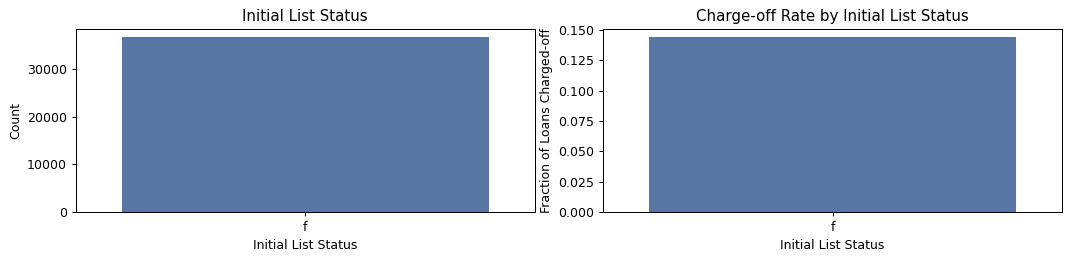

In [95]:
#plot distplot of 'initial_list_status'
plot_var('initial_list_status', 'Initial List Status', continuous=False)

In [96]:
#encoding loan_status variable with 0 and 1
data['charged_off'] = (data['loan_status'] == 'Charged Off').apply(np.uint8)
data.drop('loan_status', axis=1, inplace=True)

In [97]:
data.shape

(36641, 21)

In [98]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'log_annual_inc', 'log_revol_bal', 'charged_off'],
      dtype='object')

In [99]:
#add dummies to above selected variables
data = pd.get_dummies(data, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status'], drop_first=True)

In [100]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,log_annual_inc,log_revol_bal,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000,36 months,10.65%,162.87,10.0,Dec-11,27.65,Jan-85,3,0,83.70%,9,4.380229,4.135101,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,60 months,15.27%,59.83,0.0,Dec-11,1.00,Apr-99,3,0,9.40%,4,4.477136,3.227372,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,36 months,15.96%,84.33,10.0,Dec-11,8.72,Nov-01,2,0,98.50%,10,4.088242,3.470851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000,36 months,13.49%,339.31,10.0,Dec-11,20.00,Feb-96,10,0,21%,37,4.691974,3.748110,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000,36 months,7.90%,156.46,3.0,Dec-11,11.20,Nov-04,9,0,28.30%,12,4.556315,3.901131,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#print correlation between every two variables
data.iloc[:5,:15].corr()

,loan_amnt,installment,emp_length,dti,open_acc,pub_rec,total_acc,log_annual_inc,log_revol_bal,charged_off
loan_amnt,1.000000,0.995587,0.418850,0.598394,0.811551,NaN,0.940489,0.744423,0.459195,-0.449748
installment,0.995587,1.000000,0.495511,0.625268,0.786859,NaN,0.954174,0.679790,0.473352,-0.514404
emp_length,0.418850,0.495511,1.000000,0.733768,-0.016614,NaN,0.487526,-0.278515,0.478857,-0.772683
dti,0.598394,0.625268,0.733768,1.000000,0.217084,NaN,0.423650,0.186068,0.884061,-0.688193
open_acc,0.811551,0.786859,-0.016614,0.217084,1.000000,NaN,0.755228,0.824488,0.336650,-0.354787
pub_rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_acc,0.940489,0.954174,0.487526,0.423650,0.755228,NaN,1.000000,0.586335,0.225979,-0.448143
log_annual_inc,0.744423,0.679790,-0.278515,0.186068,0.824488,NaN,0.586335,1.000000,0.224434,0.094554
log_revol_bal,0.459195,0.473352,0.478857,0.884061,0.336650,NaN,0.225979,0.224434,1.000000,-0.735981
charged_off,-0.449748,-0.514404,-0.772683,-0.688193,-0.354787,NaN,-0.448143,0.094554,-0.735981,1.000000
